# RepMet usecase:  Business analytics via brand recognition in media

## Introduction 

One of the ways to measure a brand popularity is to quantify its appearance in public - on the street, in social media, in specialized events. For a simple example, Nike would know to gauge the popularity of their product by observing the 'Nike' logo in public, in social media's posts, and especially in running events. Moreover, when the logo is intentionally placed in media for the commercial purposes (e.g., on stadium's billboards, Formula-1 hoods, shoes of the main character of the movie), its important to know how much of this is actually observed by the viewers. 
A techological solution for this kind of brand research is the Logo Recognition task. The brand of interest (that of the company, or that of its main competitors) can be searched for in the relevant media (images or video footage), where all instances and their screen time are automatically identified. 

The RepMet model was trained on a large collection of images featuring 205 brand logos. The following code initializes the RepMet environment and runs the detection on 
a few typical images for the regular logo recognition:

In [1]:
%run -i 'notebook_startup.py'
%matplotlib inline
args.scfg_fname = '../experiments/serv_configs/csfg_logo_usecase_01.yaml'
args.scfg_args = 'NA'
args.gpu = 0 # the GPU ordinal on multti-GPU machine
fs_serv = FSD_serv(args)  # create the FSD service object 
fs_serv.setup()  # setup detection engine, classes list, set up aug.generator, logger, performance evaluator
disp_folder = '../data/Logo/logo_usecase_data/perm_detections'
from utils.show_boxes import disp_dets2
from logo_usecase_routines import test_on_query_image, display_RedHat_examples


2019-10-16 03:30:13,941 - my_logger - INFO -  ========= starting FSD service csfg_logo_usecase_01


{'gpu': 0, 'scfg_fname': '../experiments/serv_configs/csfg_logo_usecase_01.yaml', 'scfg_args': 'NA'}


2019-10-16 03:30:14,304 - my_logger - INFO - Loading a trained model ./output/FSD_service/csfg_logo_usecase_01/the_novl_model-0000.params
2019-10-16 03:30:14,460 - my_logger - INFO - Novel products model is loaded
2019-10-16 03:30:14,461 - my_logger - INFO - No container model is loaded
2019-10-16 03:30:14,463 - my_logger - INFO - No alternative model is loaded


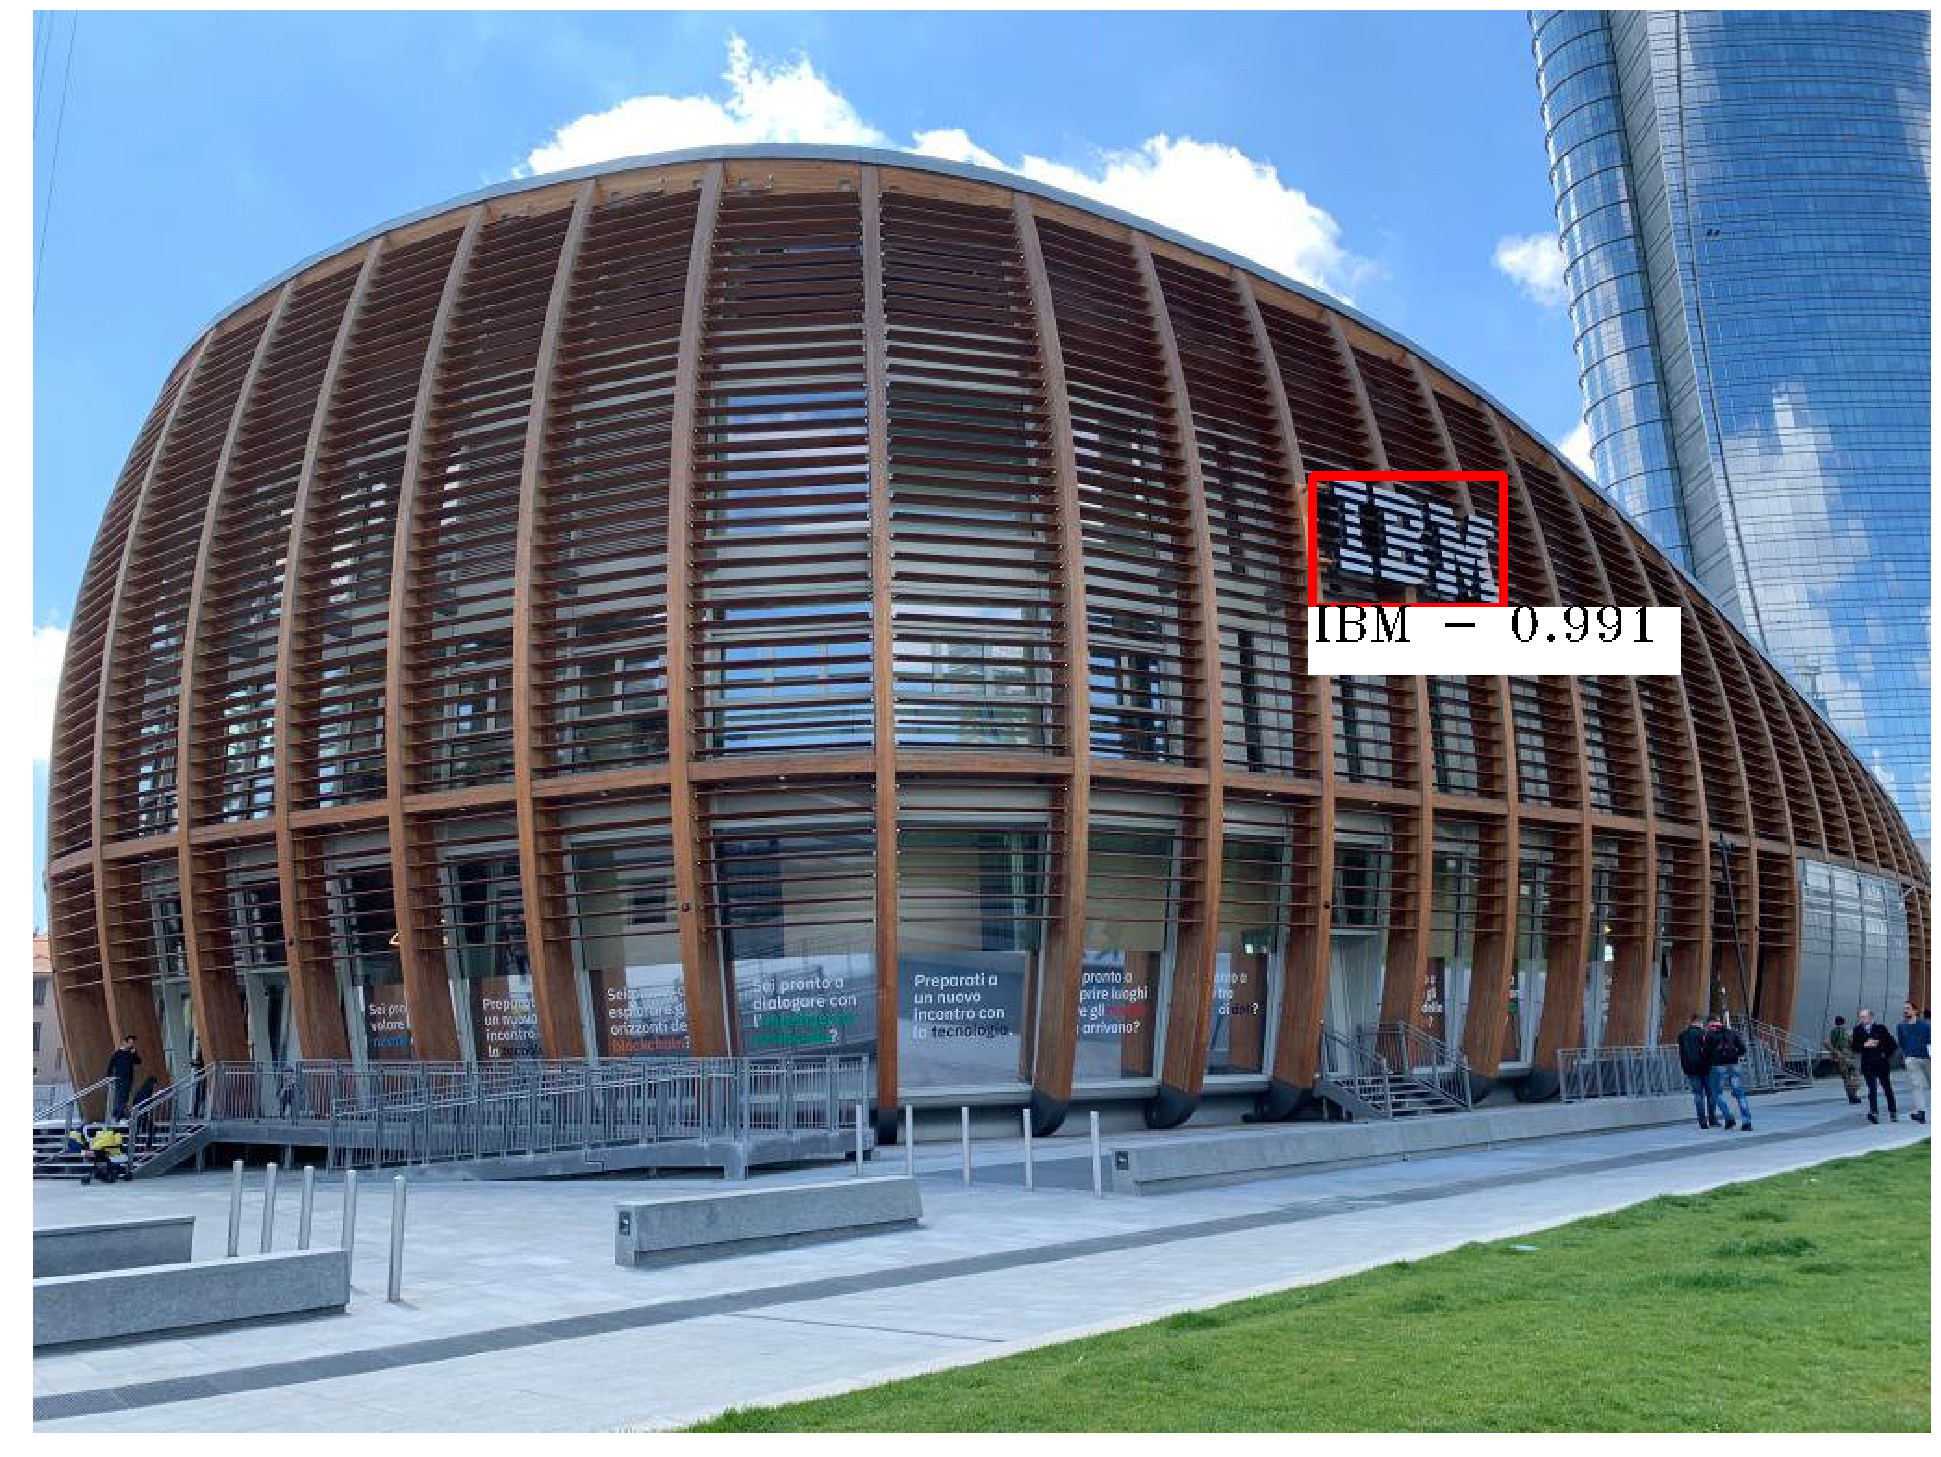

In [12]:
test_img_fname = '../data/Logo/logo_usecase_data/IBM/IBM_in_the_wild_4.jpg'
test_on_query_image(fs_serv,test_img_fname,score_thresh=0.3,figure_factor=4,FontScale=0.9)

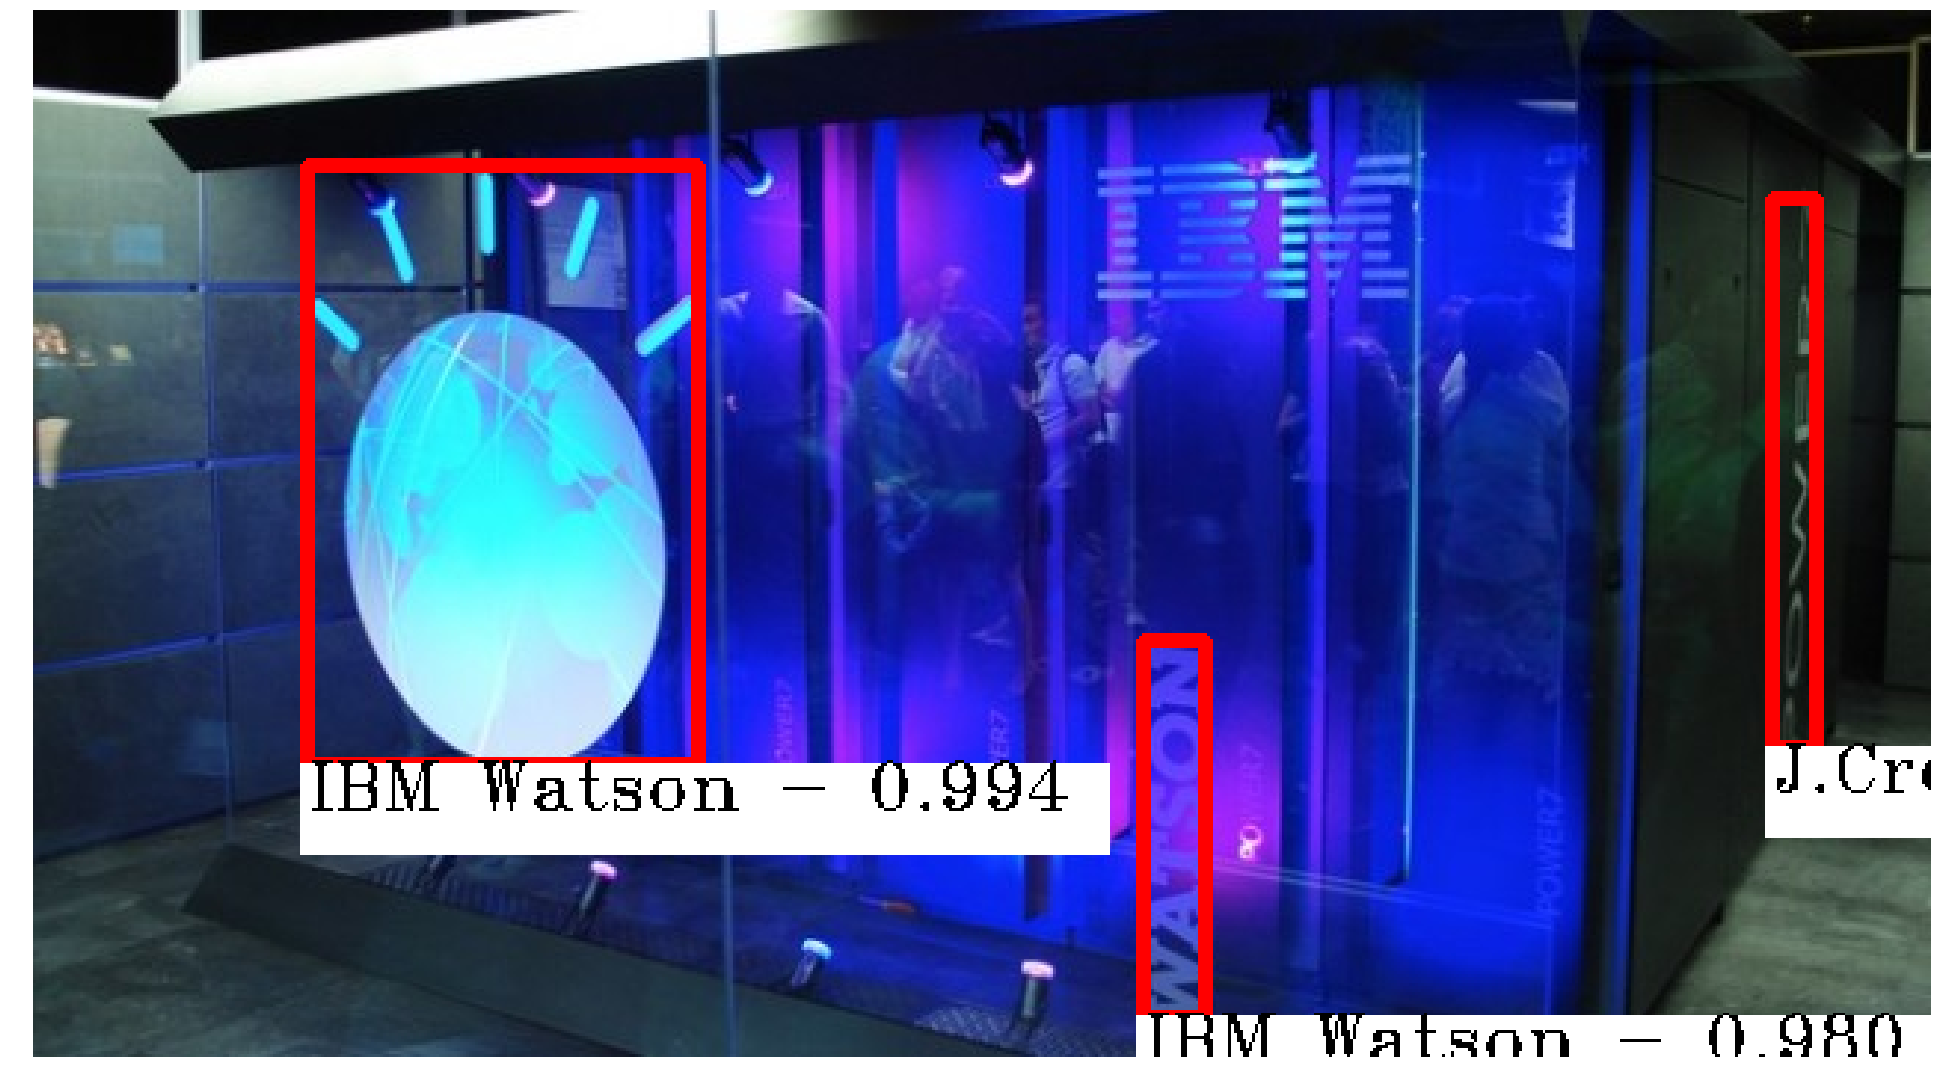

In [16]:
test_img_fname = '../data/Logo/logo_usecase_data/IBM/Watson-640x353.jpg'
test_on_query_image(fs_serv,test_img_fname,score_thresh=0.05,figure_factor=4,FontScale=0.75)

## Few-shot training for new brands

The difficult conditions of logo recognition in the wild (changing perspective, illumination, appearance in small portion of an image, etc.) requires a large amount of traning images to be harvested for each brand, like it was done to achive the performance above (IBM has used a service of a company whos photographers went to harvest the appearances of required brands in teh city, and whos annotators have prepared the data).
Moreover, training a detector for just a few brands will not result in a good performance, since the detector must be trained with rich and heterogeneous set of visual objects.

When providing logo recognition as a service, one needs to meet the demand of adapting the detector to new brands (new clients) or different appearances of old brands (local variations of the logo, special editions, etc.) with relatively little effort, e.g. using a small number of examples. 

Here the few-shot detection comes into the picture. With detector like RepMet, sometimes just a few examples is enough to enable data analytics for a new client or to adjust to specifics of a new event.

The introduction of a new class example to RepMet consists of two stages:
 - Compute the feature vector, representing the image region with the food item, and use it as the representative of the new class
 - When all the representatives are in place, (optionally) perform partial* finetuning of the model, adjusting it to the new classes.
The detection of the few-shot classes is performed on a separate instance of the model, where no previous (permanent) object categories are present. Those are detected with the original version of the model, trained in the standard fashion, and the results are fused in the later stage.
 
_* the finetuning is performed only for the few last layers of the network_

In the following example, we provide a small dataset exemplifying the logo of a new brand, unseen during the regular training, and perform the few-shot training of RepMet to add this brand to the set of recognized logos.

### examples of training images:

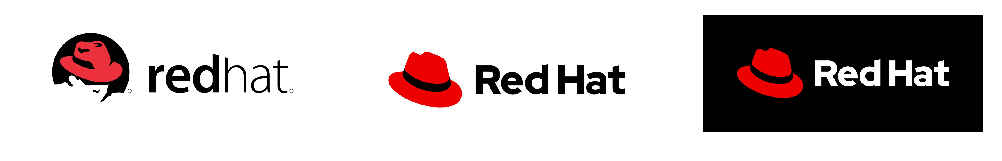

In [4]:
display_RedHat_examples()

### enrollment of daily foods into the detector:

In [28]:
zip_path = '../data/Logo/logo_usecase_data/RedHat/RedHat_enrollment/RedHat.zip'
novel_train_type = 1 # types: 0 - no finetuning, 1 - fast fine-tuning, 2 - full fine-tuning
fs_serv.train_novel_classes(zip_path, novel_train_type, num_scenes=-1, train_stop_event=None)

2019-10-16 03:24:00,783 - my_logger - DEBUG - Starting novel class training using ../data/Logo/logo_usecase_data/RedHat/RedHat_enrollment/RedHat.zip.
2019-10-16 03:24:00,925 - my_logger - INFO - train_novel_classes: using path names with root ./output/FSD_service/csfg_logo_usecase_01/novel_images/logo1.jpg
2019-10-16 03:24:00,927 - my_logger - INFO - - running train_model with novel_train_type=1


gen_train_data: using folder ./output/FSD_service/csfg_logo_usecase_01/novel_images


2019-10-16 03:24:05,413 - my_logger - INFO - Introducing novel classes to the model
2019-10-16 03:24:05,416 - my_logger - INFO - Generating reps. Class RedHat: 4 good samples, 0 bad samples
2019-10-16 03:24:05,437 - my_logger - INFO - Performing fine-tuning


total size 4
total size 4


2019-10-16 03:24:07,430 - my_logger - INFO - Epoch[0] Train-R-CNN FG Accuracy=0.000000
2019-10-16 03:24:07,432 - my_logger - INFO - Epoch[0] Train-RCNNAcc=0.880859
2019-10-16 03:24:07,433 - my_logger - INFO - Epoch[0] Train-RCNNLogLoss=1.038628
2019-10-16 03:24:07,434 - my_logger - INFO - Epoch[0] Train-RCNNL1Loss=0.031790
2019-10-16 03:24:07,438 - my_logger - INFO - Epoch[0] Time cost=0.115


total size 4
-------- training epoch 0 ---------------
total size 4
precomputed_training: 2.01541018486 sec


2019-10-16 03:24:08,218 - my_logger - INFO - Loading a trained model ./output/FSD_service/csfg_logo_usecase_01/the_novl_model-0000.params


### test on query images
Now the Lacoste logo may be found in images with the clothes by this company:

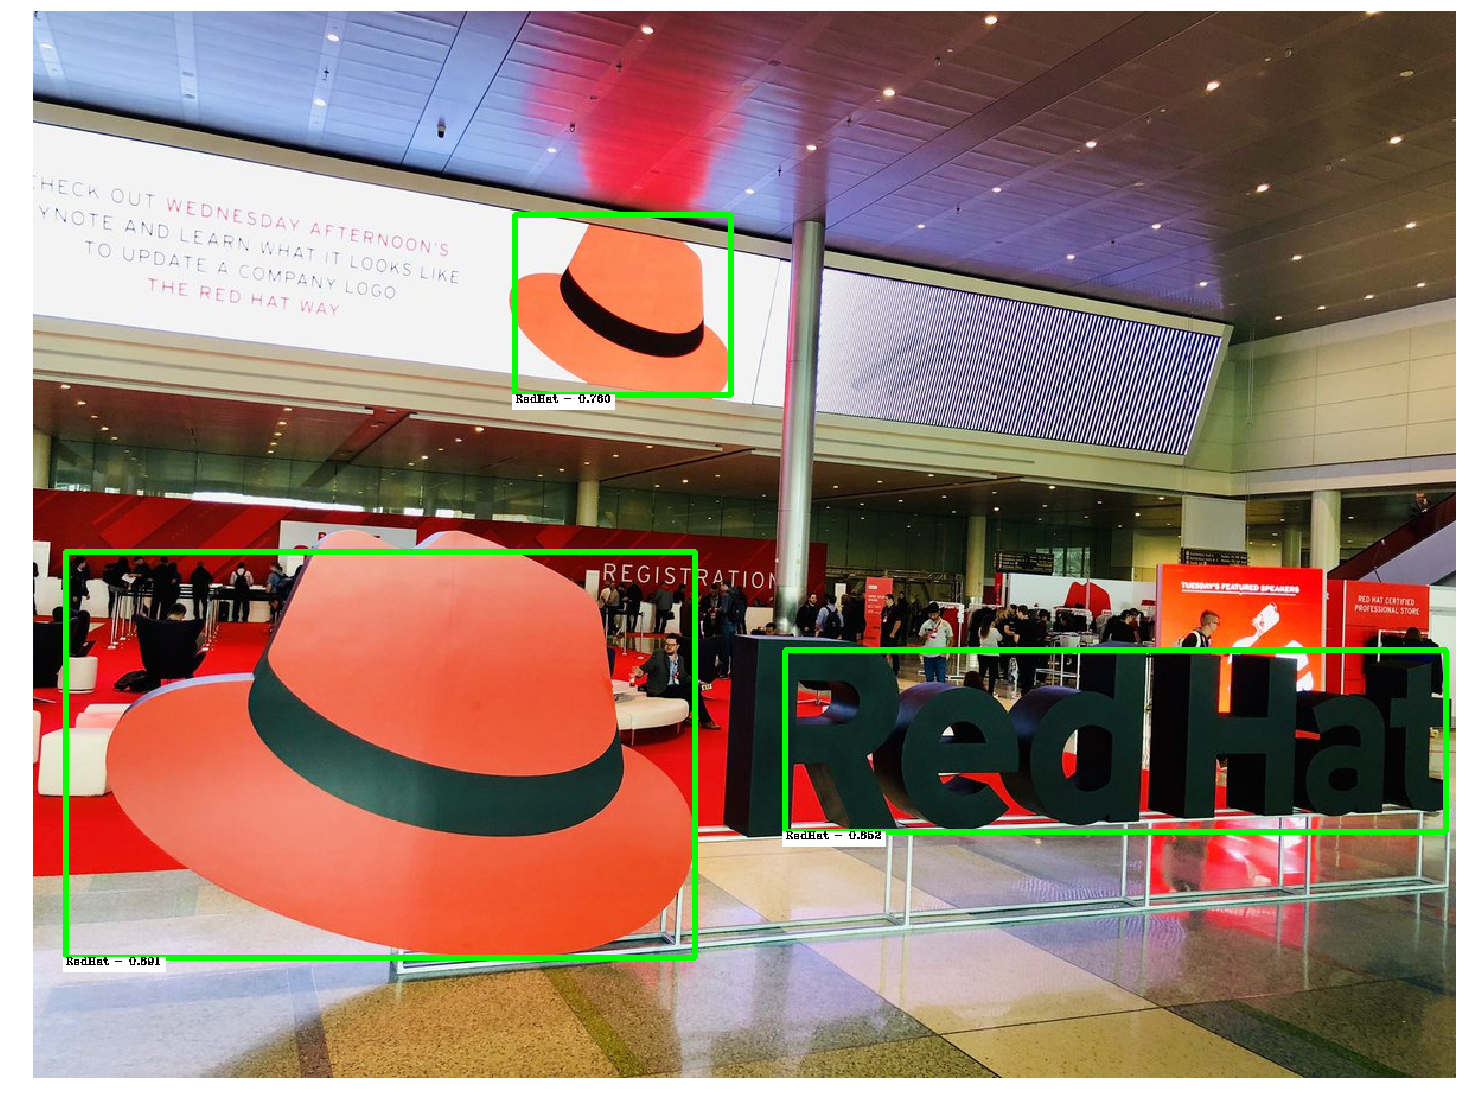

In [30]:
test_img_fname = '../data/Logo/logo_usecase_data/RedHat/RedHat_test/red-hat.jpg'
test_on_query_image(fs_serv,test_img_fname,score_thresh=0.5,det_engines=2,figure_factor=3.0,FontScale=0.3)

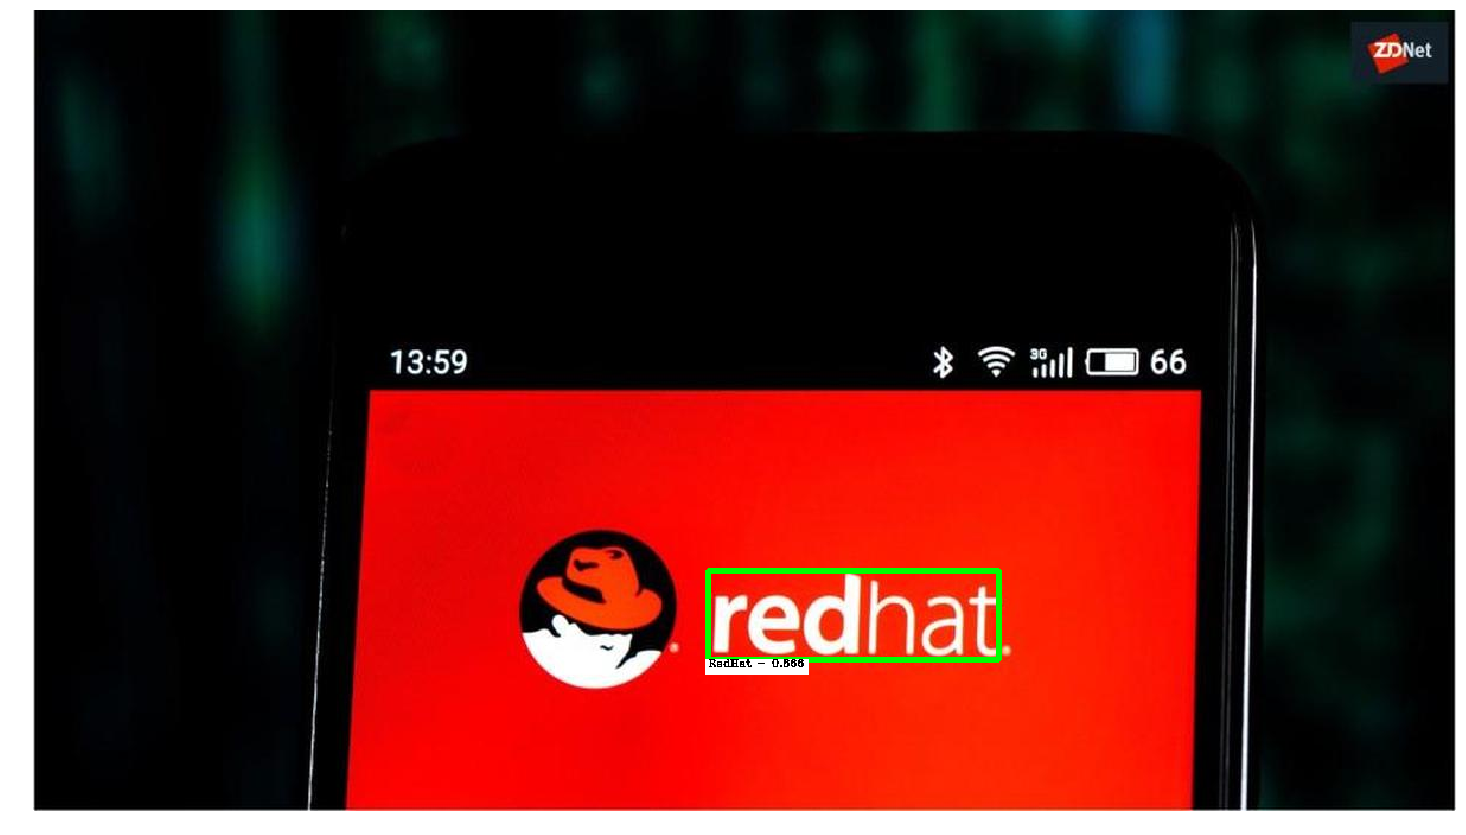

In [29]:
test_img_fname = '../data/Logo/logo_usecase_data/RedHat/RedHat_test/img3.jpg'
test_on_query_image(fs_serv,test_img_fname,score_thresh=0.5,det_engines=2,figure_factor=3.0,FontScale=0.3)

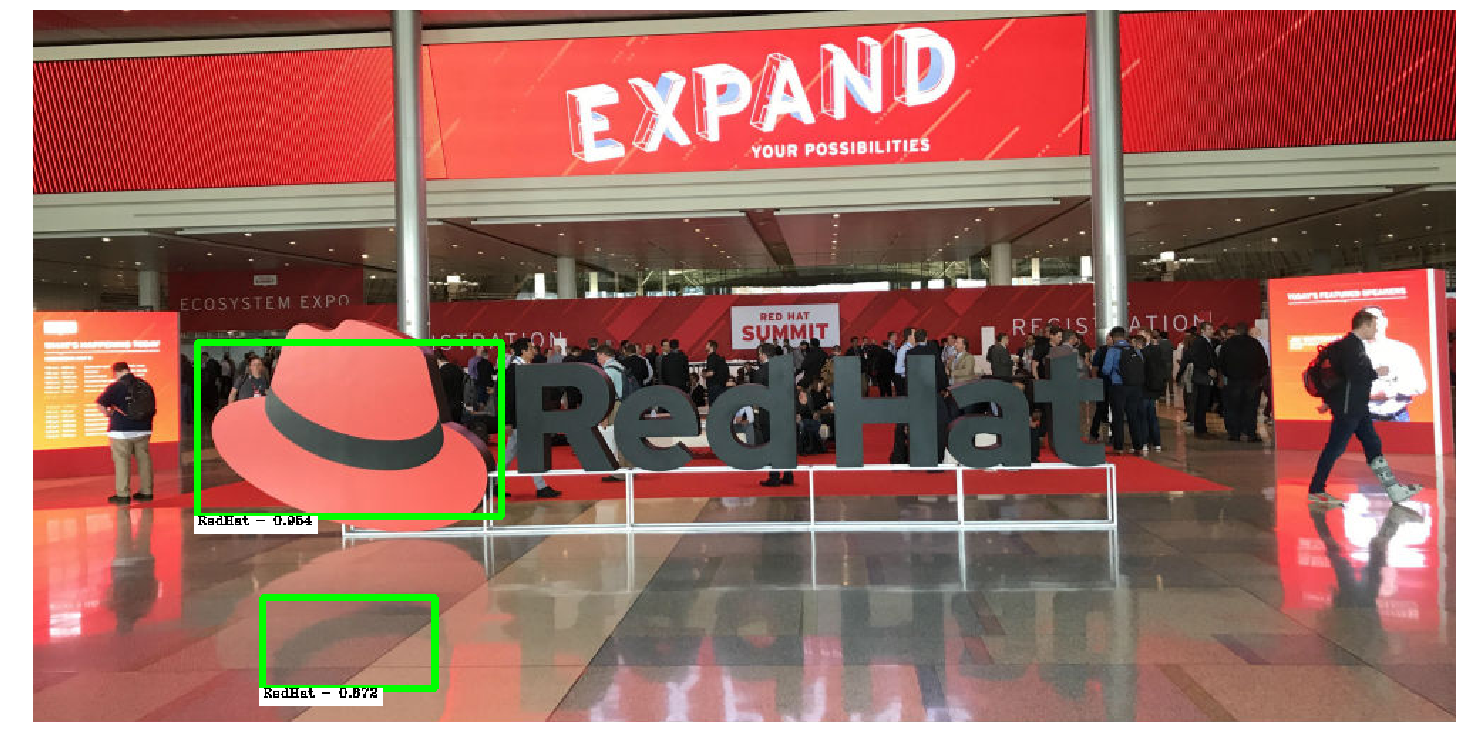

In [31]:
test_img_fname = '../data/Logo/logo_usecase_data/RedHat/RedHat_test/Red-Hat1.jpg'
test_on_query_image(fs_serv,test_img_fname,score_thresh=0.5,det_engines=2,figure_factor=3.0,FontScale=0.3)

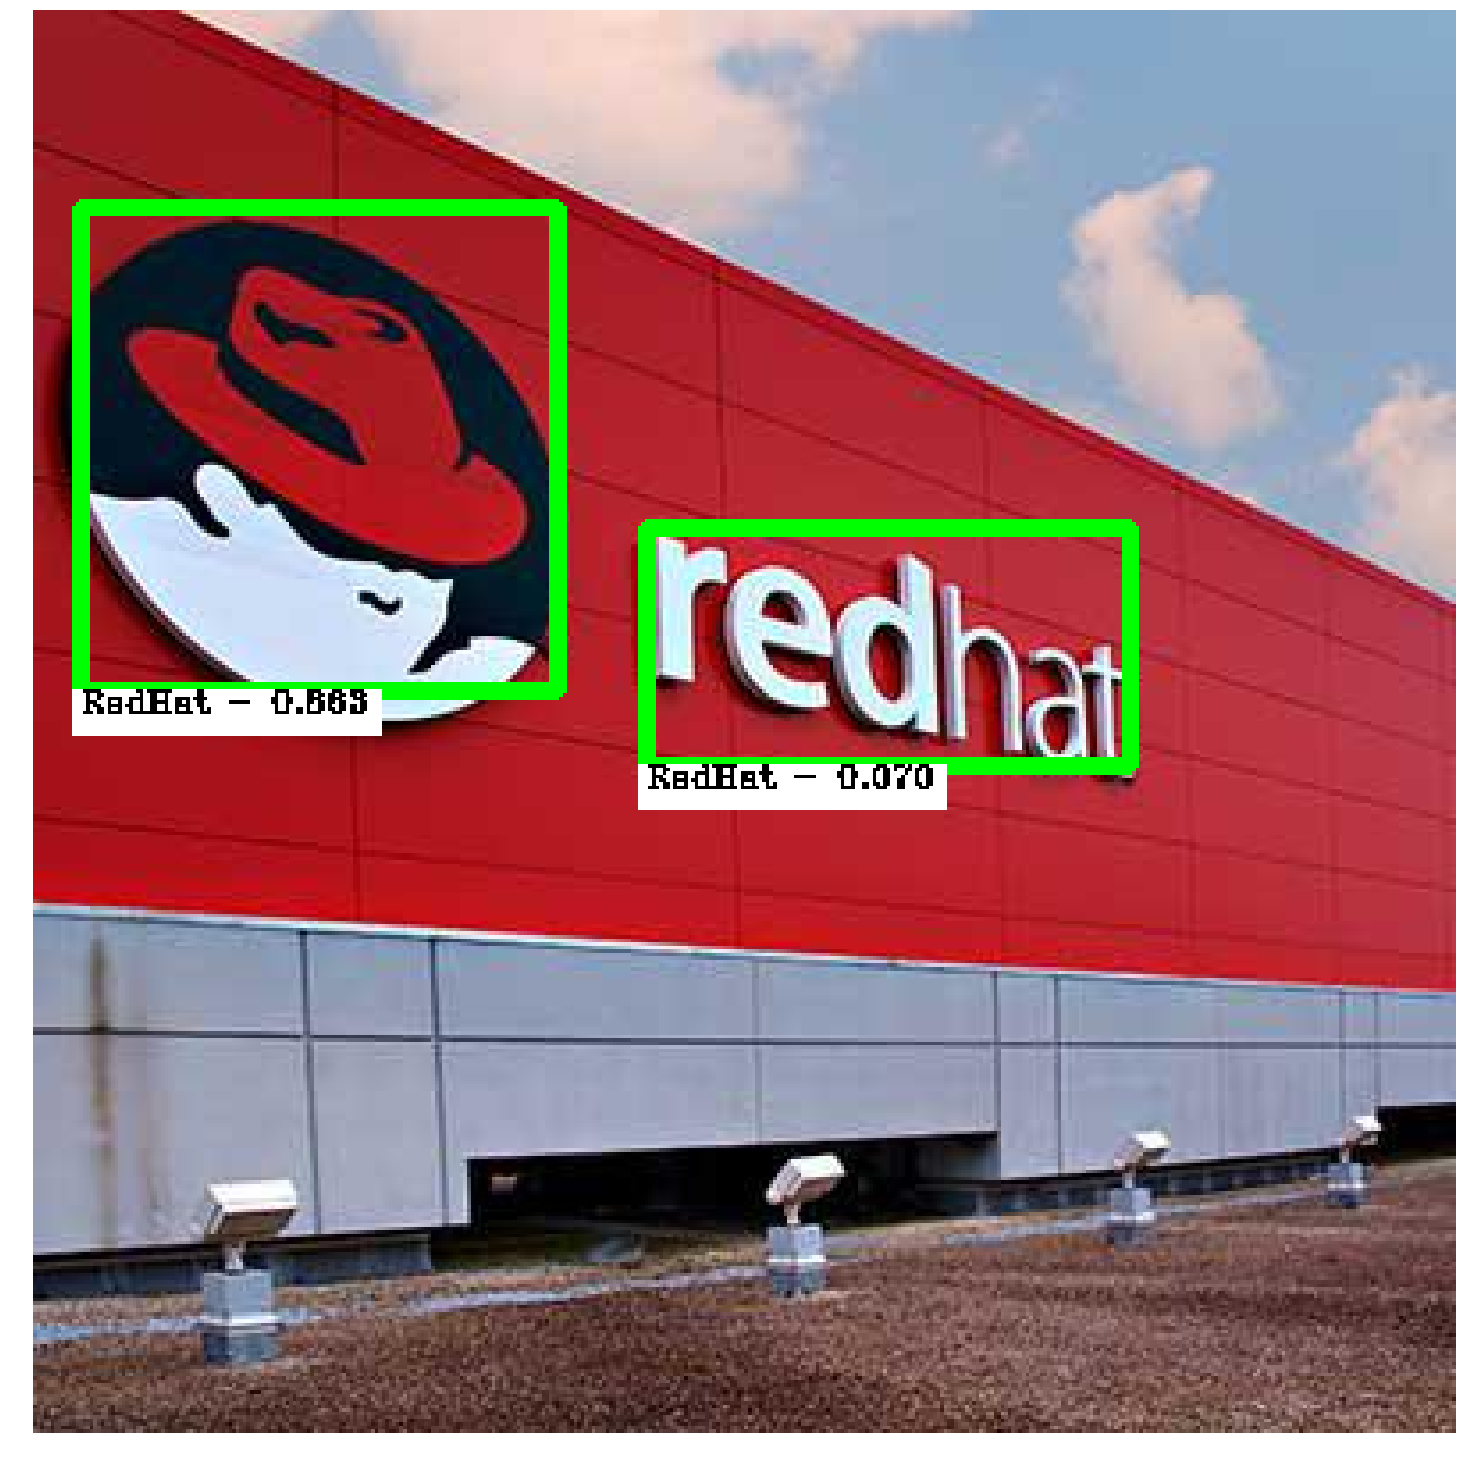

In [36]:
test_img_fname = '../data/Logo/logo_usecase_data/RedHat/RedHat_test/red-hat-hq.jpg'
test_on_query_image(fs_serv,test_img_fname,score_thresh=0.01,det_engines=2,figure_factor=3.0,FontScale=0.3)

## Quantitative performance evaluation
The RepMet engine, evaluated as a standard detector for permanent Logo categories, has performed at mean Average Precision of 82%.